In [3]:
# FILES
from stock import OHLCV, Interval, Window, Indicators

In [5]:
# PACKAGES
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import json

In [7]:
# PORTFOLIO
data = []
with open("portfolio.json", "r") as f:
    data = json.load(f)

In [13]:
ticker_list = []

for account in data:
    for stock in account["stocks"]:
        ticker_list.append(f"{stock['ticker']}.{stock['market']}")

ticker_list = list(set(ticker_list))

In [14]:
ticker_list

['MMT.PA',
 'AF.PA',
 'CO.PA',
 'URW.AS',
 'COFA.PA',
 'LI.PA',
 'NXI.PA',
 'KN.PA',
 'CS.PA',
 'ETL.PA',
 'GLE.PA']

In [24]:
main_df = pd.DataFrame()

for ticker in ticker_list[:2]:
    print(f"Fetching {ticker}...")
    tmp_df = OHLCV.fetch(ticker)

    main_df[ticker] = tmp_df["close"]

main_df["TOTAL"] = main_df.sum(axis=0)

print(main_df)
print(main_df.info())

Fetching MMT.PA...
Fetching AF.PA...
            MMT.PA  AF.PA  TOTAL
date                            
2019-11-13   16.31  10.19    NaN
2019-11-14   16.42  10.32    NaN
2019-11-15   16.37  10.57    NaN
2019-11-18   16.06  10.55    NaN
2019-11-19   16.11  10.59    NaN
...            ...    ...    ...
2020-11-09   10.52   3.92    NaN
2020-11-10   11.22   4.03    NaN
2020-11-11   11.30   3.96    NaN
2020-11-12   11.16   3.94    NaN
2020-11-13   11.58   3.89    NaN

[256 rows x 3 columns]
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 256 entries, 2019-11-13 to 2020-11-13
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   MMT.PA  256 non-null    float64
 1   AF.PA   256 non-null    float64
 2   TOTAL   0 non-null      float64
dtypes: float64(3)
memory usage: 8.0 KB
None


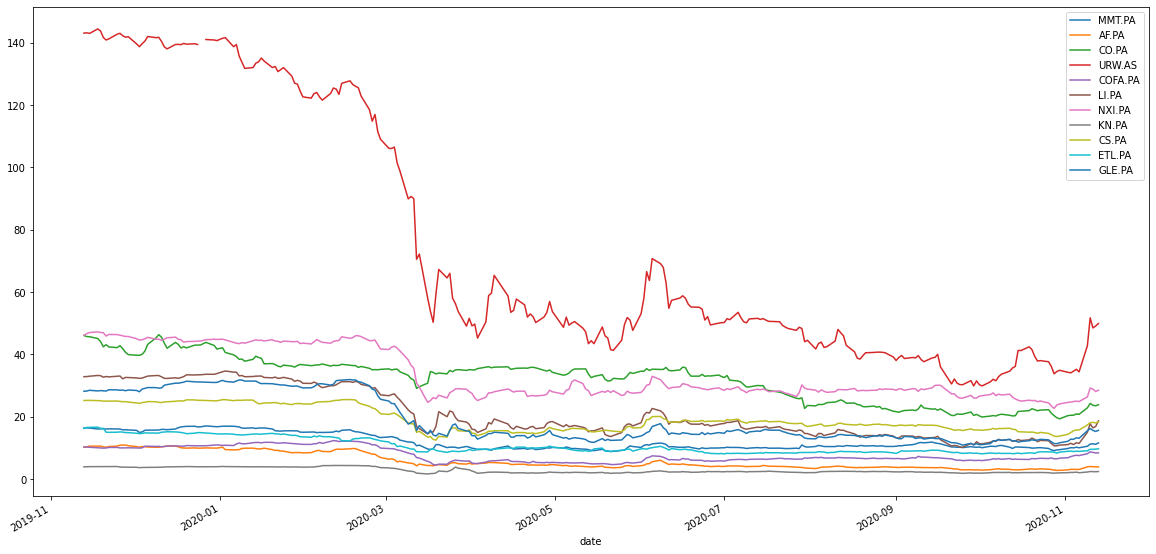

In [21]:
main_df.plot(figsize=(20,10));

In [11]:
ticker = "MIOTA-USD"

df = OHLCV.fetch(ticker, interval=Interval.HOUR, window=Window.TWO_YEARS, indicators=[Indicators.MA])
df

,open,high,low,close,volume,ma_5,ma_10,ma_20,ma_30,ma_50,ma_100,ma_200
date,,,,,,,,,,,,
2019-10-16 00:00:00,0.28,0.28,0.28,0.28,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-10-16 01:00:00,0.28,0.28,0.28,0.28,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-10-16 02:00:00,0.28,0.28,0.28,0.28,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-10-16 03:00:00,0.28,0.28,0.28,0.28,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-10-16 04:00:00,0.28,0.28,0.28,0.28,0.00,0.28,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-11-13 13:00:00,0.25,0.25,0.25,0.25,236.11,0.25,0.25,0.25,0.25,0.25,0.25,0.26
2020-11-13 14:00:00,0.25,0.26,0.25,0.25,144.18,0.25,0.25,0.25,0.25,0.25,0.25,0.26
2020-11-13 15:00:00,0.26,0.26,0.25,0.26,0.00,0.25,0.25,0.25,0.25,0.25,0.25,0.26


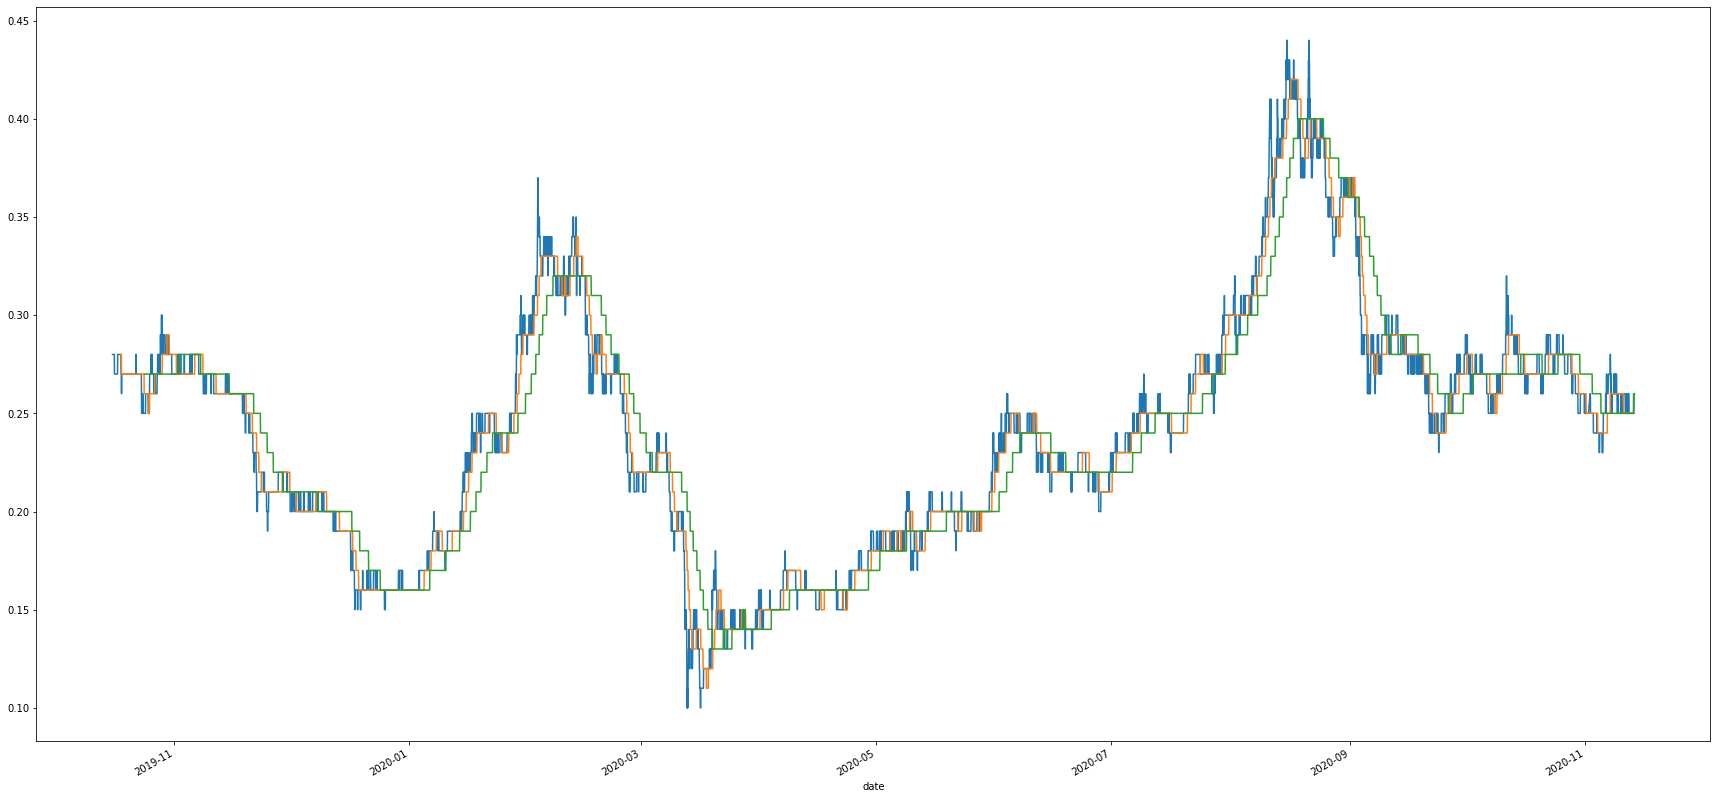

In [12]:
df["close"].plot(figsize=(30, 15));
df["ma_50"].plot(figsize=(30, 15));
df["ma_200"].plot(figsize=(30, 15));